<a href="https://colab.research.google.com/github/Inderpaal/Stock-Clustering-and-Analysis/blob/main/P02_Project_1154643.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance tensorflow scikit-learn matplotlib


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import yfinance as yf

#Import Model Packages
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

In [ ]:
start_date = '2021-09-30'
end_date = '2024-09-30'
tickers = ['AAL', 'AAPL', 'ALL', 'ANET', 'ANSS', 'APA', 'APD', 'ARE', 'AVB', 'AVGO',
           'BAC','BDX', 'BK', 'BLK', 'BRO', 'C', 'CB', 'CDW', 'CINF', 'CMCSA', 'CME',
           'CMG', 'CPT', 'CTAS', 'CVS', 'CVX', 'DG', 'DUK', 'EBAY', 'ED', 'EG', 'ETN',
           'ETSY', 'EXPD', 'FAST', 'FI', 'FITB', 'FMC', 'GE', 'GIS', 'GOOG',
           'HBAN', 'HES', 'HII', 'HPQ', 'IPG', 'IR', 'JBHT', 'JPM', 'KHC', 'KMB',
           'KMX', 'KO', 'LHX', 'LNT', 'LOW', 'LYV', 'MA', 'MAA','TSLA']
ohlc = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  60 of 60 completed


The stock 'FLT' has been delisted. Hence it is removed from the portfolio and has been rerun without it.

In [ ]:
prices = ohlc["Adj Close"].dropna(how="all")

In [ ]:
prices.tail()

Ticker,AAL,AAPL,ALL,ANET,ANSS,APA,APD,ARE,AVB,AVGO,...,KMB,KMX,KO,LHX,LNT,LOW,LYV,MA,MAA,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-23 00:00:00+00:00,10.98,226.470001,192.889999,385.570007,321.269989,25.440001,290.313812,120.867538,231.410065,172.940002,...,141.210007,76.449997,71.730003,237.729996,60.349998,262.290009,104.660004,496.479919,163.660004,250.000000
2024-09-24 00:00:00+00:00,11.04,227.369995,191.820007,385.070007,324.190002,25.340000,293.832764,123.073593,228.412857,174.839996,...,141.050003,76.500000,71.330002,234.740005,60.049999,266.040009,107.430000,486.762817,162.889999,254.270004
2024-09-25 00:00:00+00:00,11.00,226.369995,190.000000,388.209991,319.380005,24.570000,293.962006,122.925201,227.916626,175.520004,...,141.199997,74.489998,71.449997,233.320007,59.950001,264.970001,106.949997,488.800110,161.559998,257.019989
2024-09-26 00:00:00+00:00,11.79,227.520004,188.690002,386.299988,324.839996,23.150000,297.679779,120.283875,224.820190,178.089996,...,142.179993,78.209999,71.400002,231.559998,59.900002,265.609985,108.150002,490.617676,158.720001,254.220001
2024-09-27 00:00:00+00:00,11.56,227.789993,188.360001,380.260010,325.149994,24.530001,298.574402,119.720001,223.529999,172.690002,...,142.539993,77.320000,71.790001,234.990005,60.740002,267.140015,108.739998,492.984558,157.770004,260.459991


In [ ]:
prices.shape

(753, 60)

In [ ]:
prices.describe()

Ticker,AAL,AAPL,ALL,ANET,ANSS,APA,APD,ARE,AVB,AVGO,...,KMB,KMX,KO,LHX,LNT,LOW,LYV,MA,MAA,TSLA
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,14.746109,170.239309,129.362323,182.186866,305.005538,34.372627,259.085061,133.586296,186.355459,82.014967,...,123.888208,84.597915,58.230561,207.463544,51.859157,210.133447,91.009416,382.060725,151.451519,238.234285
std,2.555137,24.104951,23.343166,79.377211,43.550272,5.826072,24.379547,26.975792,22.950686,37.868148,...,8.455062,21.671590,4.301434,19.290283,3.493904,20.850336,13.463121,51.878418,22.588681,59.764084
min,9.260000,123.855087,98.071472,85.910004,200.330002,20.046951,203.464783,87.873825,144.697144,40.973106,...,101.878075,55.689999,47.931366,157.829315,44.541580,163.828827,65.339996,280.041565,113.711777,108.099998
25%,13.100000,150.416748,111.609596,122.320000,275.230011,30.235260,236.116653,114.310638,168.775864,52.961403,...,117.995567,69.169998,56.134724,194.647232,49.319359,193.997528,81.709999,343.633484,135.043594,189.979996
50%,14.350000,169.601242,122.032349,146.460007,311.279999,33.848530,265.012604,123.073593,180.206879,61.209236,...,122.515282,79.320000,58.194092,207.689362,51.149872,208.537186,90.339996,369.218079,145.925110,235.070007
75%,16.450001,184.101410,141.488785,236.699997,329.369995,38.787319,277.225983,147.713806,204.504684,109.191971,...,128.708847,92.660004,59.984207,222.952164,54.269844,225.674957,98.730003,421.233368,163.687164,274.390015
max,22.260000,234.548523,192.889999,388.209991,411.220001,48.507496,309.350098,200.611404,234.730896,181.710449,...,147.179993,154.850006,72.512878,255.208145,60.740002,267.140015,126.040001,500.324768,208.260239,409.970001


<Axes: title={'center': 'Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

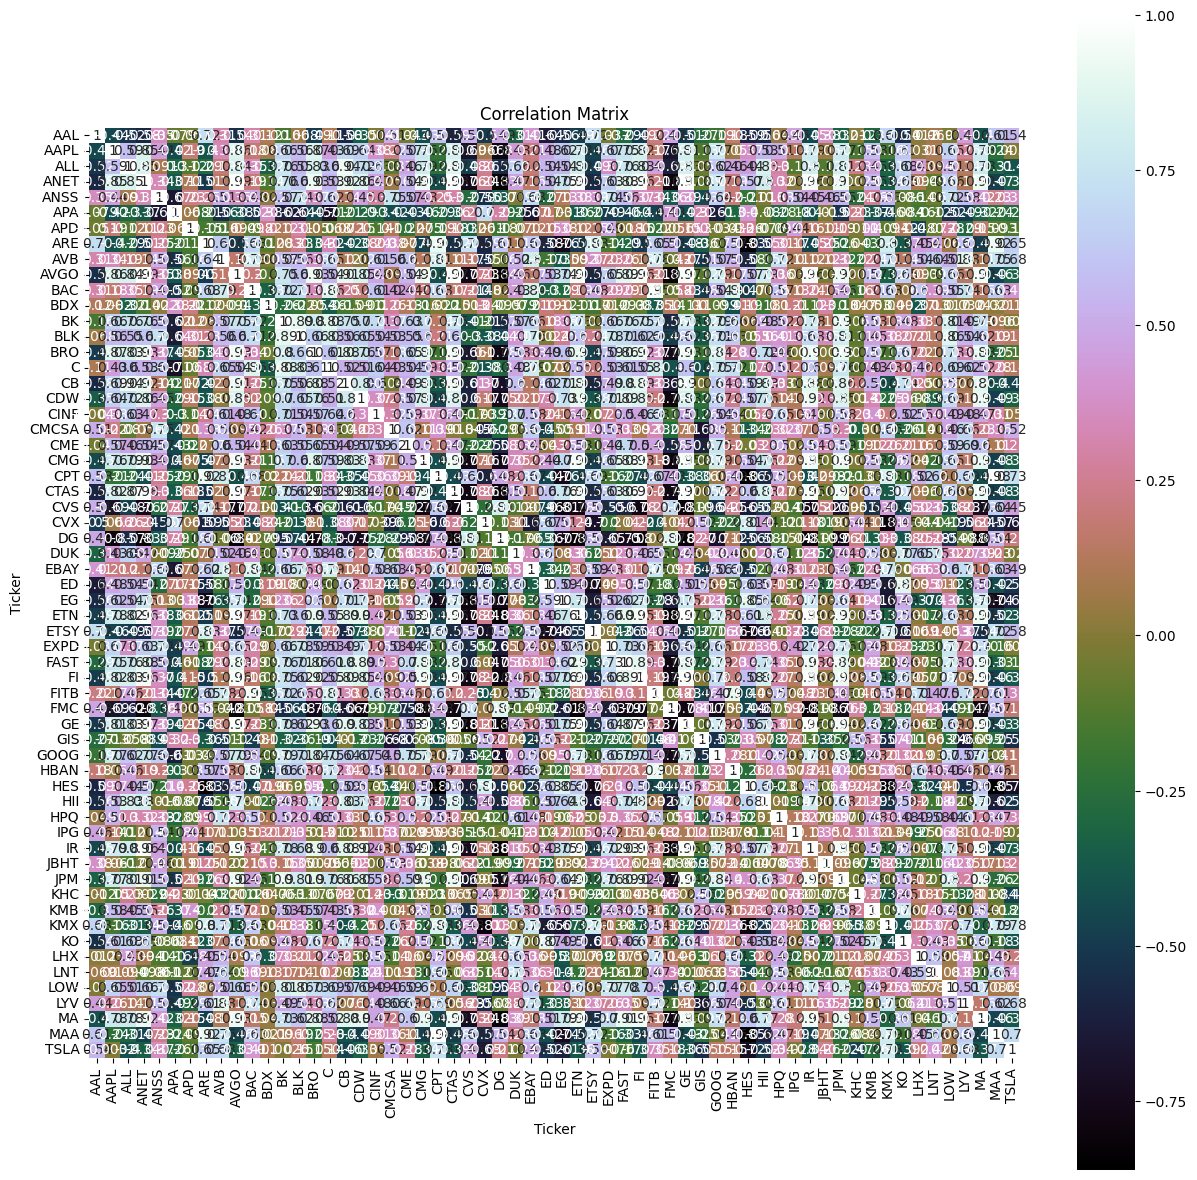

In [ ]:
# correlation
correlation = prices.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
#Checking for any null values and removing the null values'''
print('Null Values =',prices.isnull().values.any())

Null Values = False


In [ ]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices.pct_change().std() * np.sqrt(252)
data=returns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(5)

,Returns,Volatility
Ticker,,
AAL,-1.469312,1.922435
AAPL,0.577502,-0.187333
ALL,0.505098,-0.341104
ANET,3.358687,1.754087
ANSS,-0.571532,0.516698


In [ ]:
nclust=10

In [ ]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=10)

In [ ]:
#We extract the important parameters from the k-means clustering
centroids, assignments, inertia = k_means.cluster_centers_, k_means.labels_, k_means.inertia_

In [ ]:
#Extracting labels
target_labels = k_means.predict(X)
#Printing the labels
target_labels

array([5, 0, 0, 3, 2, 4, 2, 6, 7, 3, 2, 7, 0, 2, 0, 2, 7, 2, 2, 6, 7, 0,
       6, 8, 6, 0, 5, 7, 2, 7, 0, 8, 1, 2, 0, 0, 2, 2, 8, 7, 2, 2, 0, 7,
       0, 2, 0, 2, 7, 7, 7, 5, 7, 7, 7, 0, 2, 0, 6, 9], dtype=int32)

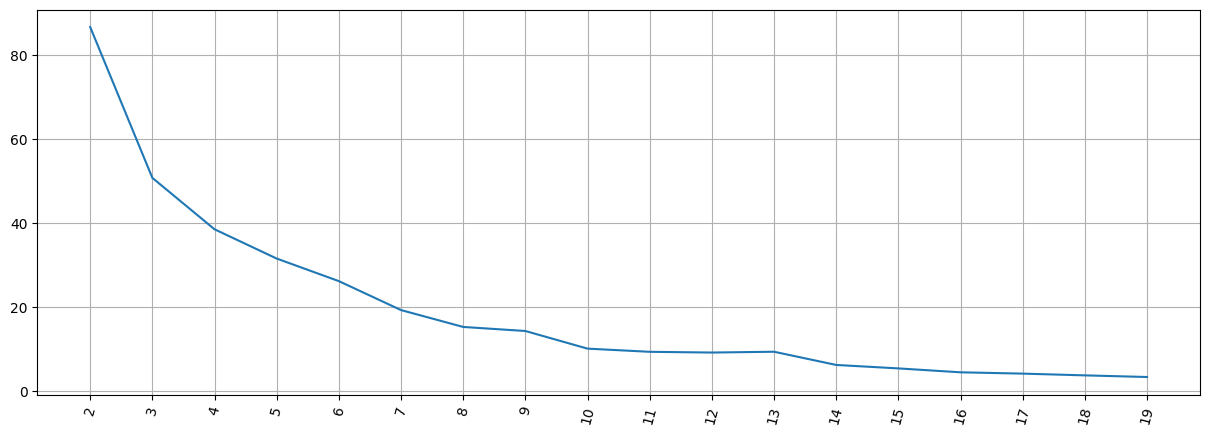

In [ ]:
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X)
    distorsions.append(kmeans_test.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

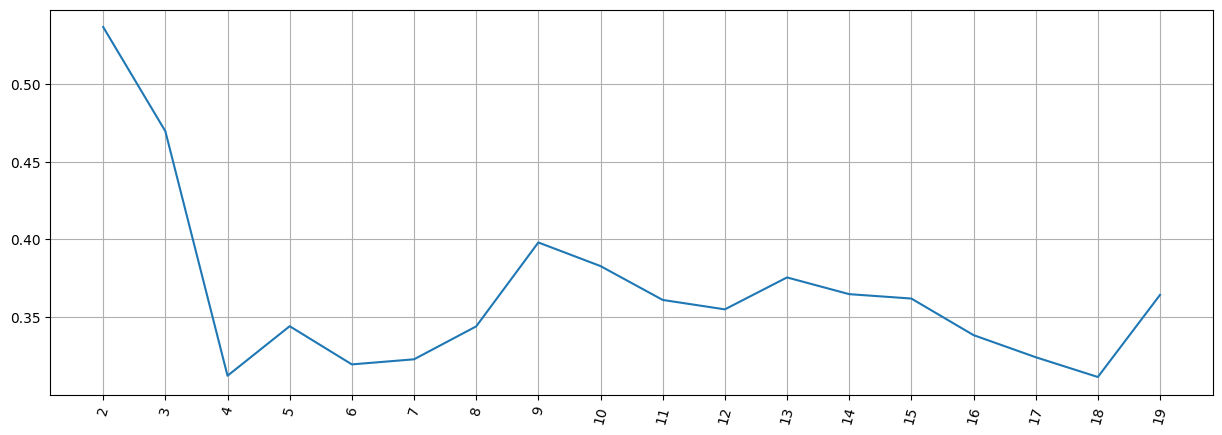

In [ ]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans_test = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans_test.fit(X)
        silhouette_score.append(metrics.silhouette_score(X, kmeans_test.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

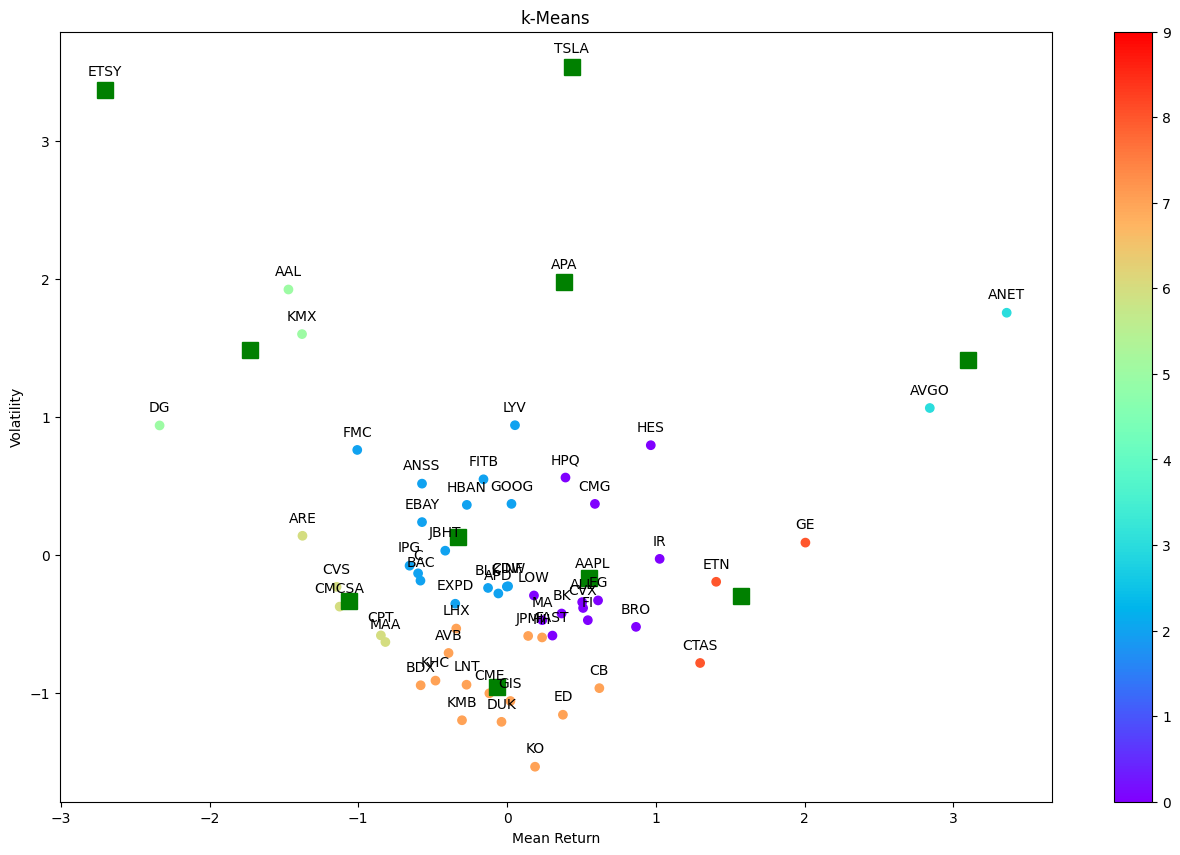

In [ ]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

In [ ]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(k_means.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
55,LOW,0
21,CMG,0
14,BRO,0
46,IR,0
12,BK,0
25,CVX,0
42,HES,0
57,MA,0
44,HPQ,0
35,FI,0


In [ ]:
nclust = 10
model = AgglomerativeClustering(n_clusters=nclust, metric = 'euclidean', linkage = 'ward')
clust_labels1 = model.fit_predict(X)

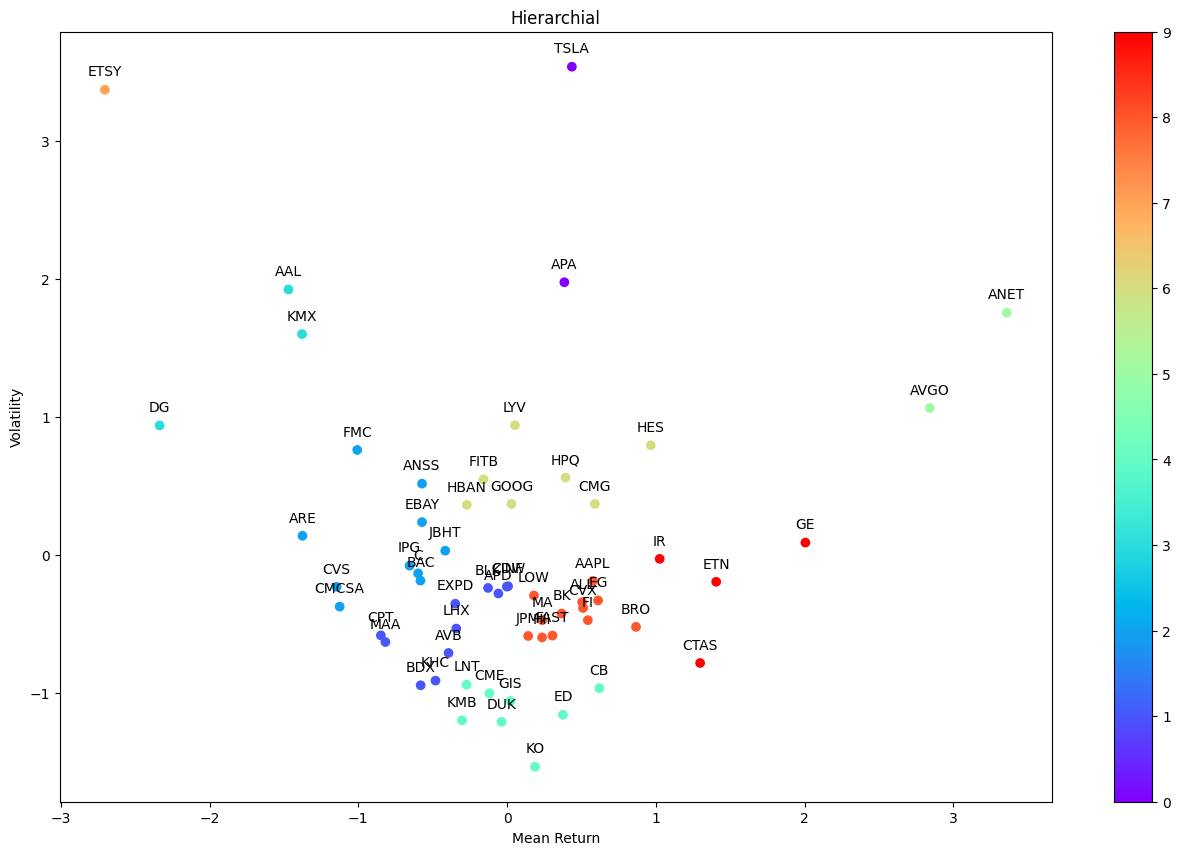

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchial')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [ ]:
ap = AffinityPropagation(damping = 0.5,max_iter = 250,affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

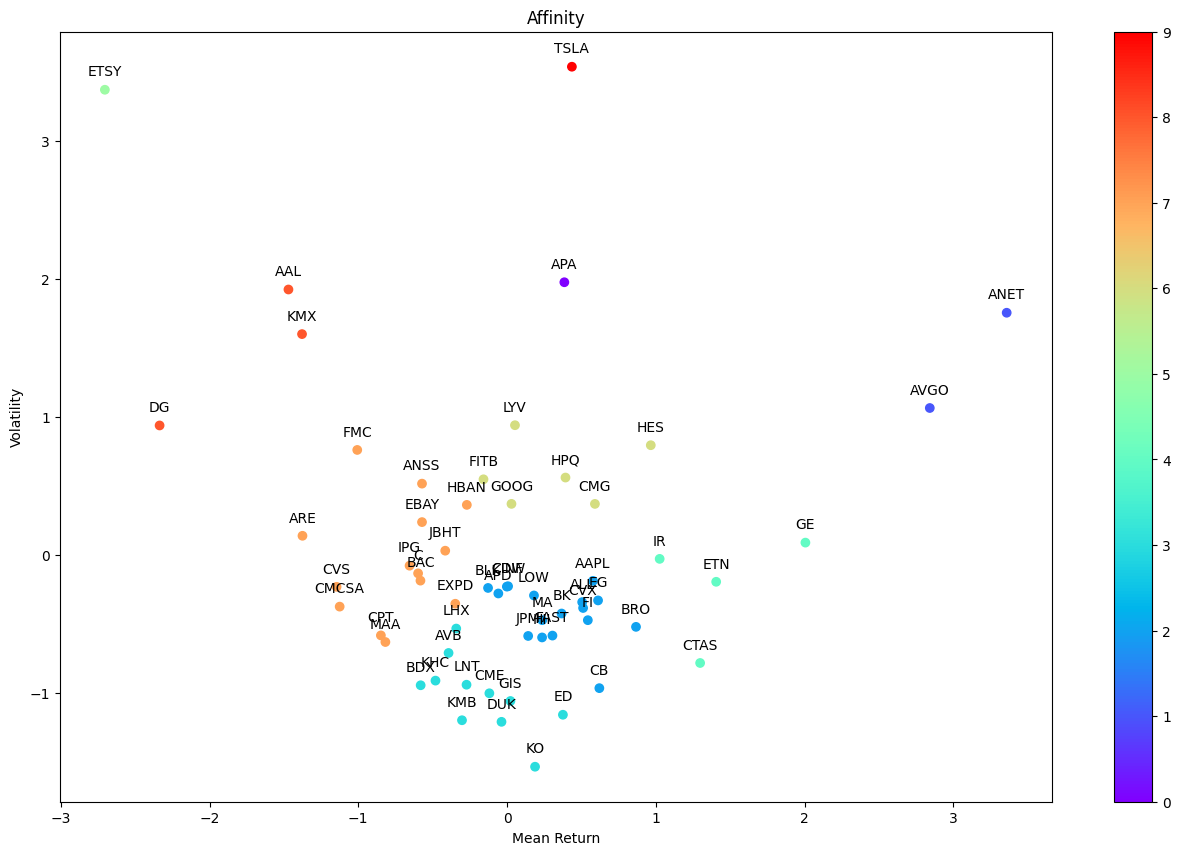

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

# zip joins x and y coordinates in pairs
for x,y,name in zip(X.iloc[:,0],X.iloc[:,1],X.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [ ]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)

Estimated number of clusters: 10


<Figure size 640x480 with 0 Axes>

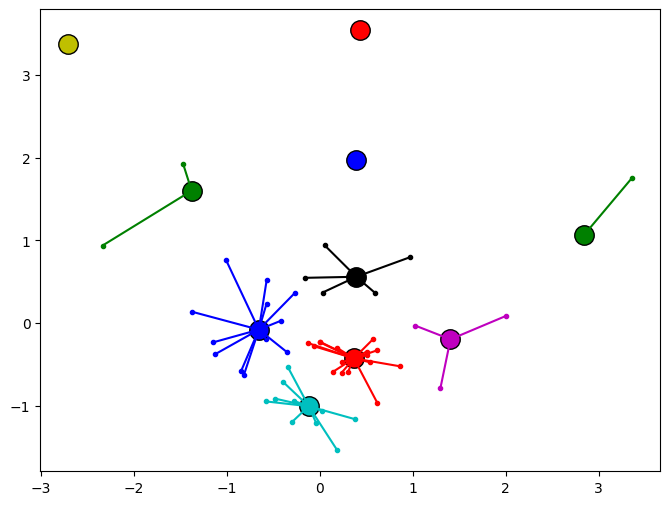

In [ ]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [ ]:
cluster_label = pd.concat([pd.DataFrame(X.index), pd.DataFrame(ap.labels_)],axis = 1)
cluster_label.columns =['Company','Cluster']
cluster_label.sort_values(by=['Cluster'])

,Company,Cluster
5,APA,0
3,ANET,1
9,AVGO,1
55,LOW,2
30,EG,2
34,FAST,2
35,FI,2
18,CINF,2
17,CDW,2
16,CB,2


In [ ]:
# Download AMZN stock data
tsla_dataset = yf.download('TSLA', start=start_date, end=end_date)

# Download S&P 500 (SP500) stock data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
sp500_norm = sp500_data['Adj Close']
sp500_lag1 = sp500_data['Adj Close'].shift(1).dropna()
sp500_lag2 = sp500_data['Adj Close'].shift(2).dropna()
sp500_lag3 = sp500_data['Adj Close'].shift(3).dropna()

# Extract the 'Close' prices for both AMZN and SP500
tsla_prices = tsla_dataset['Adj Close']

# Get the intersection of the indices for all lags
common_index = sp500_norm.index.intersection(sp500_lag1.index).intersection(sp500_lag2.index).intersection(sp500_lag3.index)

# Align TSLA prices to the common index
tsla_aligned = tsla_prices.loc[common_index]
sp500_norm_aligned = sp500_norm.loc[common_index]
sp500_lag1_aligned = sp500_lag1.loc[common_index]
sp500_lag2_aligned = sp500_lag2.loc[common_index]
sp500_lag3_aligned = sp500_lag3.loc[common_index]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


<Figure size 640x480 with 0 Axes>

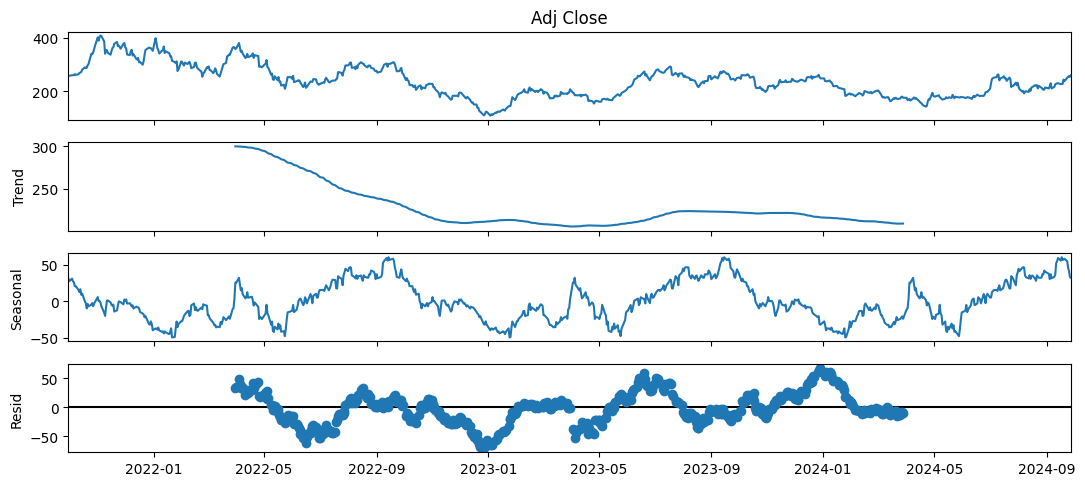

In [ ]:
decomposition = seasonal_decompose(tsla_prices,period=252)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,5)
plt.savefig('Graph_Trend_and_Season_F612.png')

In [ ]:
import statsmodels.tsa.api as smt
import seaborn as sns
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<Axes: title={'center': 'TSLA'}, xlabel='Date'>,
 <Axes: title={'center': 'Autocorrelation'}>,
 <Axes: title={'center': 'Partial Autocorrelation'}>)

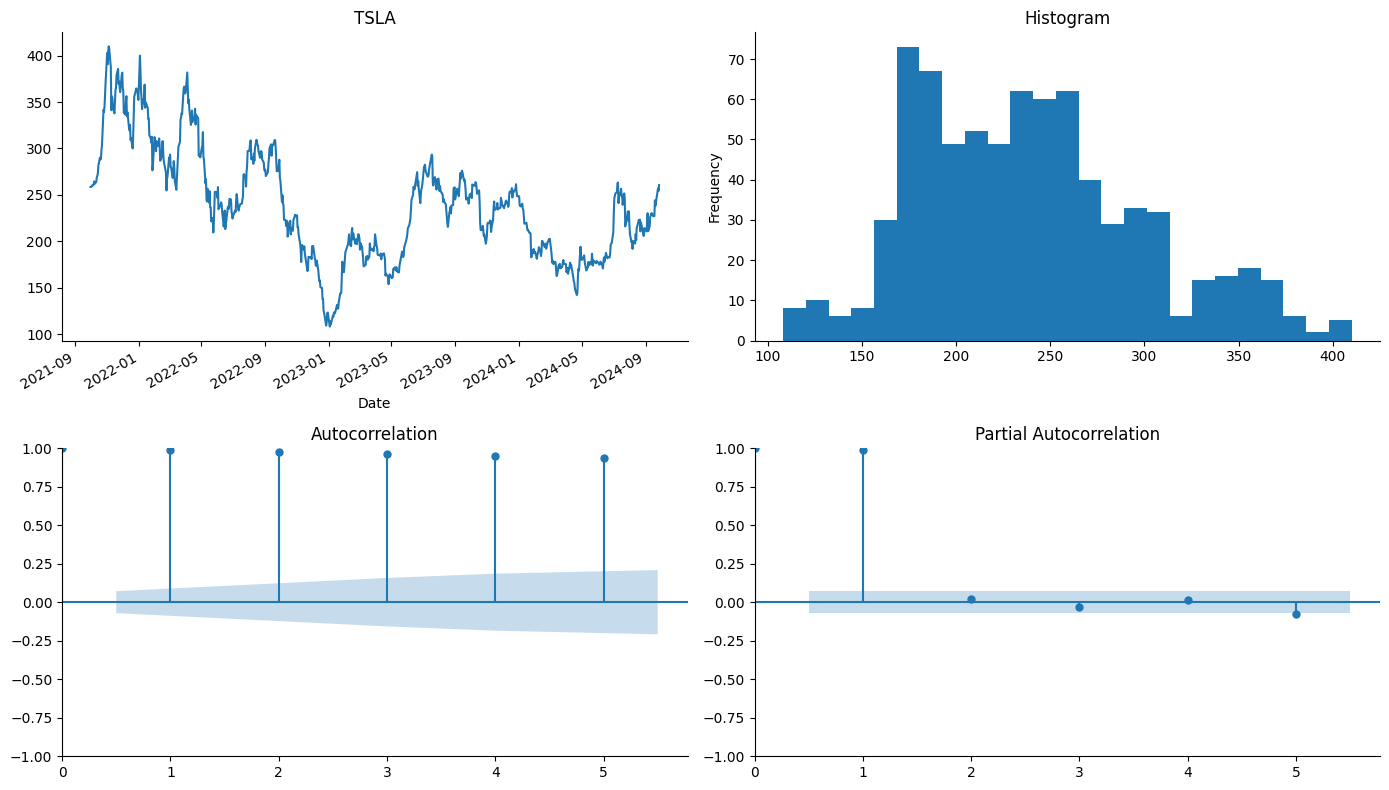

In [ ]:
tsplot(tsla_prices, title='TSLA', lags=5)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(prices):
    result = adfuller(prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')
adfuller_test(tsla_prices)

ADF Test Statistic: -2.4151499053907277
p-value: 0.13750603564308178
#Lags Used: 10
#Observation Used: 742
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Combine the three lagged S&P 500 series into a single DataFrame
exog_data = pd.DataFrame({
    'lag1': sp500_lag1_aligned,
    'lag2': sp500_lag2_aligned,
    'lag3': sp500_lag3_aligned
})
# Fit SARIMAX model
model = SARIMAX(tsla_aligned, exog=exog_data, order=(5, 1, 0))
arimax_result = model.fit()

# Predict the next 30 days with S&P500 lagged data
# Use the latest 31 S&P500 values to create the lags for the next 30 days
sp500_latest = sp500_data['Adj Close'][-33:]  # Get 33 rows to account for 3 lags
forecast_exog = pd.DataFrame({
    'lag1': sp500_latest.shift(1).dropna()[-30:],  # Lag 1 for forecasting
    'lag2': sp500_latest.shift(2).dropna()[-30:],  # Lag 2 for forecasting
    'lag3': sp500_latest.shift(3).dropna()[-30:]   # Lag 3 for forecasting
})
forecast = arimax_result.get_forecast(steps=30, exog=forecast_exog)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a new dataframe to store the predictions
forecast_dates = pd.date_range(start=tsla_aligned.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_dates)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


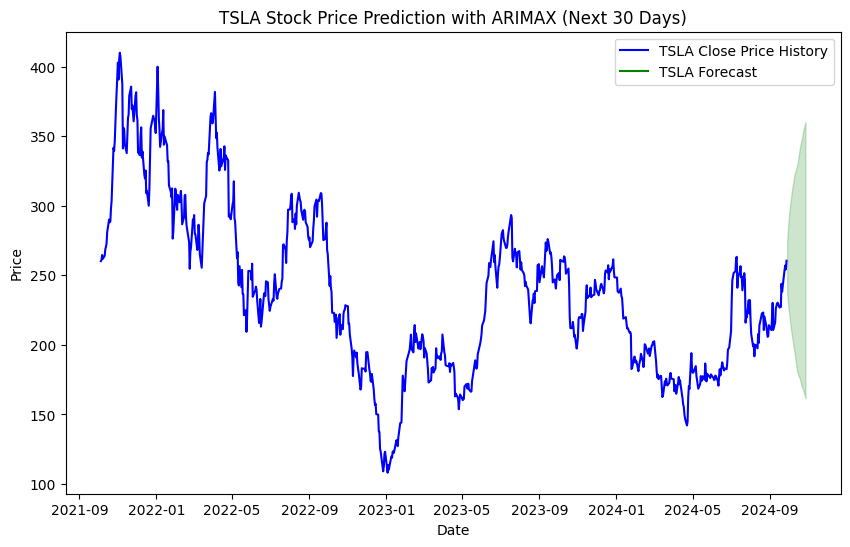

In [ ]:
# Plot historical AMZN prices along with forecasted values
plt.figure(figsize=(10,6))
plt.plot(tsla_aligned, label='TSLA Close Price History', color='blue')
plt.plot(forecast_df['Forecast'], label='TSLA Forecast', color='green')

# Adding confidence intervals
plt.fill_between(forecast_dates,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='green', alpha=0.2)

plt.title('TSLA Stock Price Prediction with ARIMAX (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

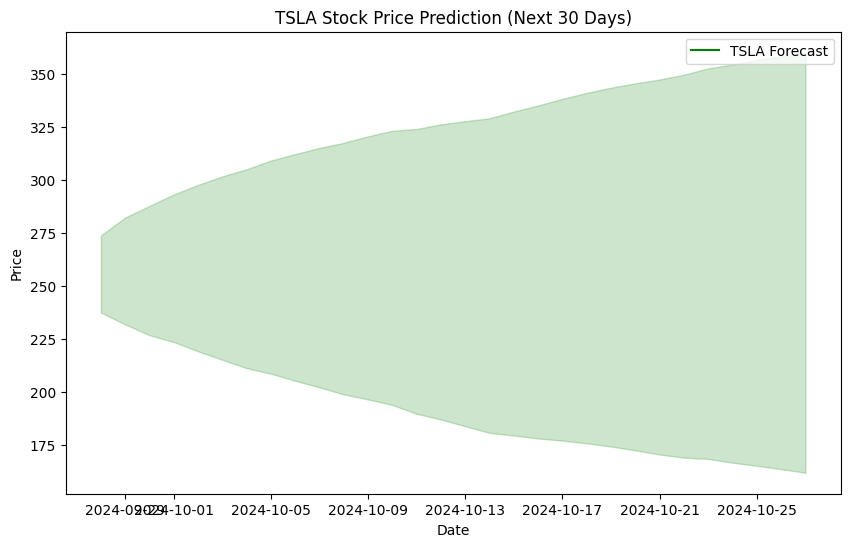

In [ ]:
# Plot only the forecasted values (predictions)
plt.figure(figsize=(10,6))
plt.plot(forecast_df['Forecast'], label='TSLA Forecast', color='green')

# Adding confidence intervals
plt.fill_between(forecast_dates,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='green', alpha=0.2)

plt.title('TSLA Stock Price Prediction (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

To insert

1. Time series correlation diagram
2. LSTM
3. Insert sp500
4. Add news

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'tsla_dataset' contains TSLA prices and 'sp500_data' contains S&P 500 prices

# Create 3 lagged features for the S&P 500
for i in range(1, 4):
    sp500_data[f'SP500_lag{i}'] = sp500_data['Adj Close'].shift(i)

# Drop NaN values resulting from the lagging
sp500_data.dropna(inplace=True)

# Combine lagged S&P 500 features with TSLA prices
data = pd.DataFrame({
    'TSLA': tsla_dataset['Adj Close'].loc[sp500_data.index],
    **{f'SP500_lag{i}': sp500_data[f'SP500_lag{i}'] for i in range(1, 4)}
})

# Define features (S&P 500 lags) and target (TSLA price)
X = data[[f'SP500_lag{i}' for i in range(1, 4)]]
y = data['TSLA']

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshaping for LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split (80% training, 20% testing)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for predicting the price

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Optional: Create a DataFrame for the predictions and actual values
results_df = pd.DataFrame({'Actual': y_test_original.flatten(), 'Predicted': y_pred.flatten()})

# Print results or visualize if needed
print(results_df)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2234 - val_loss: 0.0420
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1902 - val_loss: 0.0116
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1295 - val_loss: 0.0126
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0844 - val_loss: 0.0763
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - val_loss: 0.2053
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 - val_loss: 0.3032
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - val_loss: 0.3051
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0321 - val_loss: 0.2987
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - val_loss: 0.2801
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0330 - val_loss: 0.2890
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - val_loss: 0.2770
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - val_l

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 3)))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30))

# Compile the model
#model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 1, 100)              │          41,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_74 (LSTM)                       │ (None, 1, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_75 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 30)                  │           3,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 616,292 (2.35 MB)

 Trainable params: 205,430 (802.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 410,862 (1.57 MB)

In [ ]:

# prompt: evaluate the model with mae, mse, rmse, r squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# y_pred contains the model's predictions on the test set
y_pred = model.predict(X_test)

# Take the first prediction from y_pred to match the shape of y_test
y_pred = y_pred[:, 0] # Select only the first prediction for each sample
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Mean Absolute Error (MAE): 0.08863787253735521
Mean Squared Error (MSE): 0.01017248952007694
Root Mean Squared Error (RMSE): 0.10085876025451106
R-squared (R2): -0.06340937718740869


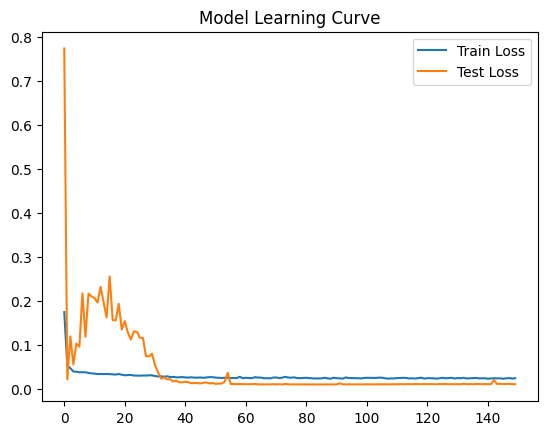

In [ ]:
x# Plot learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Learning Curve')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


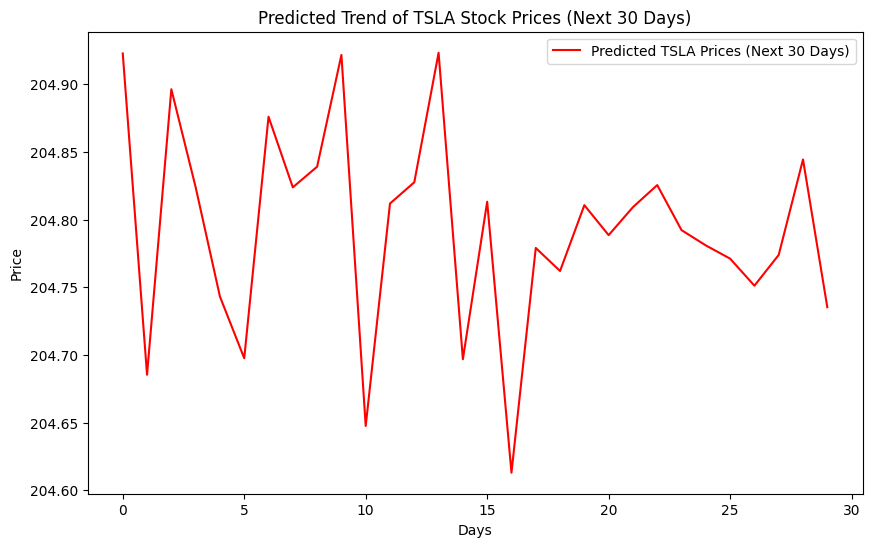

In [ ]:
# Predicting the next 30 days based on S&P 500 index
def predict_next_30_days(model, last_10_days_sp500, scaler_y):
    # Reshape last 10 days of SP500 for prediction
    input_seq = last_10_days_sp500.reshape((1, 1, last_10_days_sp500.shape[0]))

    # Predict the next 30 days
    predicted_30_days = model.predict(input_seq)

    # Rescale the predicted prices back to the original scale
    predictions_rescaled = scaler_y.inverse_transform(predicted_30_days)
    return predictions_rescaled

# Get the last 10 days of the S&P 500 data from the test set
last_10_days_sp500_scaled = X_scaled[-1, 0, :]  # Last row of X_test, last 10 days

# Predict the next 30 days for Amazon using the last S&P 500 values
predicted_30_days = predict_next_30_days(model, last_10_days_sp500_scaled, scaler_y)

# Plot the predicted trend
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 30), predicted_30_days.flatten(), label='Predicted TSLA Prices (Next 30 Days)', color='red')
plt.title('Predicted Trend of TSLA Stock Prices (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

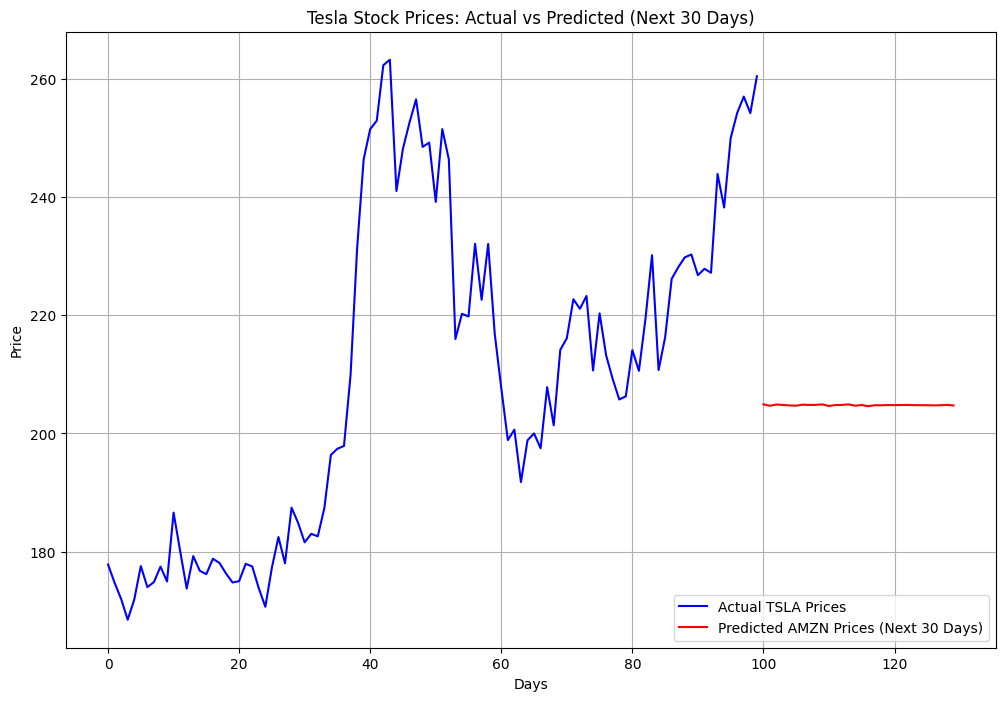

In [ ]:
# Rescale y_test to original scale for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Prepare data for plotting
# Plot the actual prices (the last 100 days) and the predicted next 30 days
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, len(y_test_rescaled[-100:])), y_test_rescaled[-100:], label='Actual TSLA Prices', color='blue')
plt.plot(np.arange(len(y_test_rescaled[-100:]), len(y_test_rescaled[-100:]) + 30), predicted_30_days.flatten(), label='Predicted AMZN Prices (Next 30 Days)', color='red')
plt.title('Tesla Stock Prices: Actual vs Predicted (Next 30 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()